<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/1123_clova_api_%EC%B6%94%EA%B8%B0(%E1%84%80%E1%85%A9%E1%84%8C%E1%85%AE%E1%86%AB%E1%84%89%E1%85%AE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 바로 돌리실 수 있게 드라이브에 마운트하였습니다.
## 구글드라이브/자료파일/Astrophysics/1122_mount


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Astrophysics/1122_mount

/content/drive/.shortcut-targets-by-id/16oCueqwvnKt564dZ0WW_5p3nppsa07g8/Astrophysics/1122_mount


# 데이터 다운로드(multiple categories Gun)

In [ ]:
#multiple categories gun
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xp2OlmobAQMlFGrRu9rO")
project = rf.workspace().project("multiple2")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to multiple2-1 in yolov5pytorch:: 100%|██████████| 4286/4286 [15:03<00:00,  4.74it/s]


# Git clone YOLOv5 

In [ ]:
#%cd /content/drive/MyDrive/yolo
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


# requirements.txt 사용
## git을 사용하다 보면 install한 패키지가 달라 문제가 생기는 경우가 있음. 이러한 문제를 예방하기 위해 requirments.txt로 패키지 종속성을 관리함.

In [ ]:
#%cd /content/yolov5/
!pip install -r /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/requirements.txt

#파일 리스트 추출

In [ ]:
from glob import glob

img_list=glob('/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/*.jpg')

# gun_img_list = glob('/content/gun_train/images/*.jpg')
# knife_img_list= glob('/content/knife_train/train/images/*.jpg')
# spanner_img_list= glob('/content/spanner_train/images/*.jpg')



In [ ]:
# img_list 개수 확인
print(len(img_list))


# # all_img_list=[]
# # for i in gun_img_list:
# #     all_img_list.append(i)
# # for i in knife_img_list:
# #     all_img_list.append(i)
# # for i in spanner_img_list:
# #     all_img_list.append(i)
    
# print(len(all_img_list))

2140


#학습용 데이터 검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

1712 428


# 이미지 경로 텍스트 파일에 저장

In [ ]:
with open('/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
import yaml

with open('/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/multiple_data.yaml', 'r') as f:
  yaml_data = yaml.safe_load(f)

print(yaml_data)

yaml_data['train'] = '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/train.txt'
yaml_data['val'] = '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/val.txt'

with open('/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/multiple_data.yaml', 'w') as f:
  yaml.dump(yaml_data, f)

print(yaml_data)

{'names': ['Axe', 'Chisel', 'Gun', 'HandCuffs', 'Knife', 'Lighter', 'Plier', 'Saw', 'Scissors', 'Screwdriver', 'Spanner', 'SupplymentaryBattery'], 'nc': 12, 'train': '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/train.txt', 'val': '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/val.txt'}
{'names': ['Axe', 'Chisel', 'Gun', 'HandCuffs', 'Knife', 'Lighter', 'Plier', 'Saw', 'Scissors', 'Screwdriver', 'Spanner', 'SupplymentaryBattery'], 'nc': 12, 'train': '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/train.txt', 'val': '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/val.txt'}


In [ ]:
yaml_data["names"][2]

'Gun'

# 데이터 학습
## 확인차 겸 epoch 은 5개만 했습니다

### 

In [ ]:
%cd /content/drive/MyDrive/Astrophysics/1122_mount/yolov5

!python train.py --img 416 --batch 16 --epochs 5 --data /content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/multiple_data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name multiple_yolov5s_results

/content/drive/.shortcut-targets-by-id/16oCueqwvnKt564dZ0WW_5p3nppsa07g8/Astrophysics/1122_mount/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/multiple_data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=multiple_yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.0-100-g5185981 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

remote: Enumerating objects: 15, done.
remote: Count

##detect.py의 save-txt랑 save-conf 를 이용하여 label을 저장


In [ ]:
from IPython.display import Image
import os

val_img_path = '/content/drive/MyDrive/train_2/H_8424-20-1000_01_322_png.rf.1af472436ef19df86dd1f7ecf8909bf2.jpg'

!python /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/detect.py --weights /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt --img 416  --conf 0.5  --save-txt --save-conf --source "{val_img_path}"

Image(os.path.join('/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/', os.path.basename(val_img_path)))

detect: weights=['/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/train_2/H_8424-20-1000_01_322_png.rf.1af472436ef19df86dd1f7ecf8909bf2.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-100-g5185981 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/MyDrive/train_2/H_8424-20-1000_01_322_png.rf.1af472436ef19df86dd1f7ecf8909bf2.jpg: 416x416 2 Guns, Done. (0.011s)
Speed: 0.6ms pre-process, 11.1ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results 

In [ ]:
from IPython.display import Image
import os

val_img_path = '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_319_png.rf.e69a933a37060b7ab1a920a29e6c7bdd.jpg'

!python /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/detect.py --weights /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt --img 416  --conf 0.5  --save-txt --save-conf --source "{val_img_path}"

Image(os.path.join('/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/', os.path.basename(val_img_path)))

detect: weights=['/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_319_png.rf.e69a933a37060b7ab1a920a29e6c7bdd.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-100-g5185981 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/16oCueqwvnKt564dZ0WW_5p3nppsa07g8/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_319_png.rf.e69a933a37060b7ab1a920a29e6c7bdd.jp

In [ ]:
from IPython.display import Image
import os

val_img_path = '/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg'

!python /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/detect.py --weights /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt --img 416  --conf 0.5  --save-txt --save-conf --source "{val_img_path}"

Image(os.path.join('/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/', os.path.basename(val_img_path)))

detect: weights=['/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt'], source=/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-100-g5185981 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/16oCueqwvnKt564dZ0WW_5p3nppsa07g8/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jp

In [ ]:
yaml_data["names"]

['Axe',
 'Chisel',
 'Gun',
 'HandCuffs',
 'Knife',
 'Lighter',
 'Plier',
 'Saw',
 'Scissors',
 'Screwdriver',
 'Spanner',
 'SupplymentaryBattery']

In [ ]:
import yaml
import os
from PIL import Image


path = "/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train"
file_list = os.listdir(path)



image_list=[]
for i in file_list:
    image_list.append(i[:-4])


#"/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/detect/" 하위 폴더에 모든 txt 파일을 찾아냄
import os
txt_list=[]
dir_path = "/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/detect/"

for (root, directories, files) in os.walk(dir_path):
    for file in files:
        if '.txt' in file:
            file_path = os.path.join(root, file)
            txt_list.append(file_path)


    
final_text_list=[] 
count=1
for i in txt_list:
    file = open(i, "r")
    strings = file.readlines()
    A=(list(strings))
    #print("#",count,"번째 이미지")
    count+=1
# 카테코리 라벨링 데이터(2)를 GUN으로 적용      
    for j in range(len(A)):
        #print(yaml_data["names"][int(A[0][0])],"이 확인되었습니다.")
        a=(A[j][-9:-1])
        #print("정확도는:",round(float(a)*100,2),"%입니다.")
        # final_text_list.append(yaml_data["names"][int(A[0][0])],"이 확인되었습니다.")
        # final_text_list.append("정확도는:",round(float(a)*100,2),"%입니다.")
        a1=yaml_data["names"][int(A[0][0])]
        b1=round(float(a)*100,2)
        final_text_list.append([a1,b1])
    file.close()    
    
    
  
    
print(final_text_list)
    

    #H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg

[['Gun', 54.38], ['Gun', 56.59], ['Gun', 52.74], ['Gun', 56.86], ['Gun', 53.39], ['Gun', 58.43], ['Gun', 69.35], ['Gun', 54.38], ['Gun', 56.59], ['Gun', 52.74], ['Gun', 56.86], ['Gun', 58.43], ['Gun', 69.35]]


In [ ]:
import os
import sys
import urllib.request

client_id = "cpnxyta5q5"
client_secret = "rRCmUPvNNg7dUSGAV93RpnHNkvUs6gt23OvvPW23"
for i in range(len(final_text_list)):
    text=str(final_text_list[i][0])+"이 검출 되었습니다."+"정확도는"+str(final_text_list[i][1])+"%입니다."
    encText = urllib.parse.quote(text)
    data = "speaker=nara&volume=0&speed=0&pitch=0&format=mp3&text=" + encText;
    url = "https://naveropenapi.apigw.ntruss.com/tts-premium/v1/tts"

    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)
    response = urllib.request.urlopen(request, data=data.encode('utf-8'))
    rescode = response.getcode()

    if(rescode==200):
        print("TTS mp3 저장")
        response_body = response.read()
        with open('촬영시작{0}.mp3'.format(i), 'wb') as f:
            f.write(response_body)
    else:
        print("Error Code:" + rescode)

TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장
TTS mp3 저장


# 1 번째 이미지
확인된 물체: Gun
정확도: 0.543843

확인된 물체: Gun
정확도: 0.565889

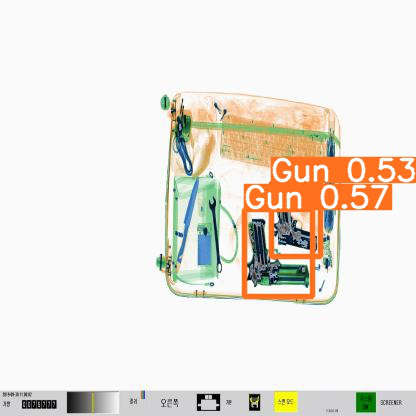

In [ ]:
Image.open("/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/detect/exp2/H_8424-20-1000_01_319_png.rf.e69a933a37060b7ab1a920a29e6c7bdd.jpg")


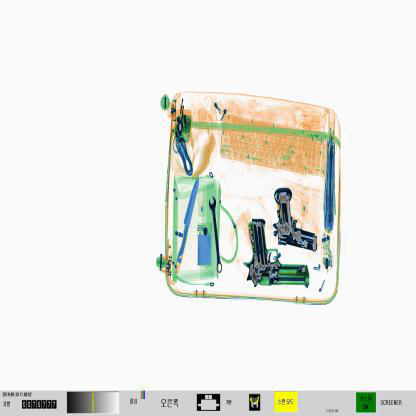

In [ ]:
Image.open("/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_319_png.rf.e69a933a37060b7ab1a920a29e6c7bdd.jpg")

# 2 번째 이미지
확인된 물체: Gun
정확도:  0.52741

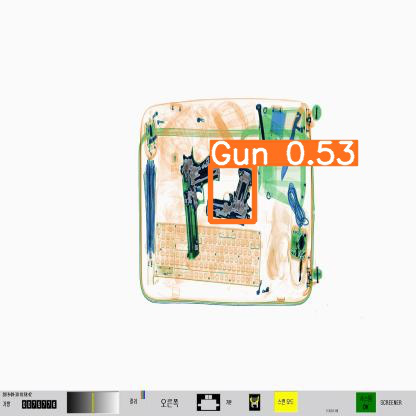

In [ ]:
Image.open("/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/detect/exp3/H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg")

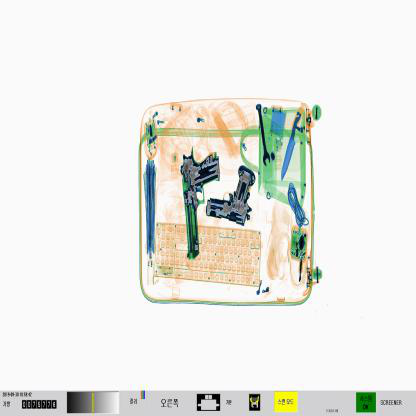

In [ ]:
Image.open("/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_320_png.rf.b33b672f0f586599ca1e5c137047a3d7.jpg")

# 4 번째 이미지
확인된 물체: Gun
정확도: 0.584261

확인된 물체: Gun
정확도: 0.693465

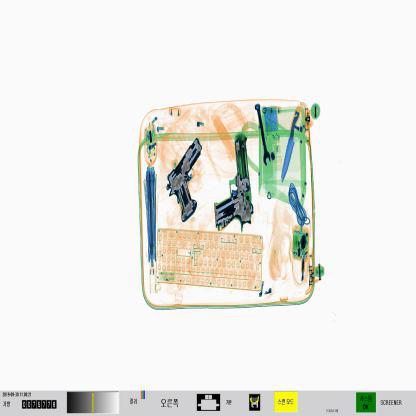

In [ ]:
Image.open("/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg")


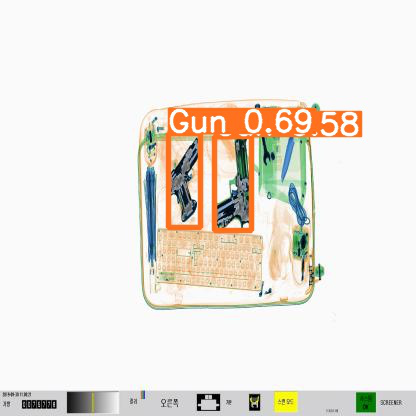

In [ ]:
Image.open("/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/detect/exp4/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg")


# 동영상 적용 코드
## abc.mp4 는 구글드라이브 엑스레이 동영상을 변경한 것입니다.
### 다 되면 runs/detect/에 저장되어있습니다.

In [ ]:
!python detect.py --source /content/multiple2-1/abc.mp4 --weights /content/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt